# Process Behaviour Charts

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.ioff()
import pandas as pd
from pandas_datareader import data as wb
import warnings
warnings.filterwarnings('ignore')

### Process Behaviour Charts: class para ploteo y análisis

In [2]:
# ejemplo de serie para el chart
PG = wb.DataReader('PG',data_source='yahoo',start='1995-1-1')
PG.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1995-01-03,15.62500,15.43750,15.46875,15.59375,3318400.0,6.320252
1995-01-04,15.65625,15.31250,15.53125,15.46875,2218800.0,6.269589
1995-01-05,15.43750,15.21875,15.37500,15.25000,2319600.0,6.180927
1995-01-06,15.40625,15.15625,15.15625,15.28125,3438000.0,6.193593
1995-01-09,15.40625,15.18750,15.34375,15.21875,1795200.0,6.168259


In [3]:
serie = PG['Close'] - PG['Close'].shift(1)
serie.head()

Date
1995-01-03        NaN
1995-01-04   -0.12500
1995-01-05   -0.21875
1995-01-06    0.03125
1995-01-09   -0.06250
Name: Close, dtype: float64

In [4]:
serie_ejemplo = serie[(serie.index.year == 2014) & (serie.index.month.isin([1,2]))]

In [5]:
class ControlChart:
    
    '''class para Control Charts
    
    Args:
        series: pandas Series
        center: middle reference line
        lower_bound: lower bound
        upper_bound: upper bound 
        
    Attributes: 
        series: pandas Series
        center: middle reference line
        lower_bound: lower bound
        upper_bound: upper bound     
    '''
    
    def __init__(self, series, center, lower_bound, upper_bound):
        self.series = series
        self.center = center
        self.lower_bound = lower_bound
        self.upper_bound = upper_bound
    '''
    LUCAS: 
    
    Cambio los atributos de colores originales a los que estuve usando
    
    original: def plot(self, series_color='blue',
             marker='o', bounds_color='black',
    
    '''
    
    def plot(self, series_color = 'black',
             marker = 'o', bounds_color = 'red',
             center_color='green', figsize = (15,6),
             title = '', xlabel = '', ylabel = '',
             show = True, export_file = False, 
             filename = 'plot.png'):
        
        '''
        Plots chart
        
        '''
        
        figure = plt.figure(figsize=figsize) 
        plt.plot(self.series.values,color=series_color,marker=marker)
        lower_line = np.ones(self.series.shape[0]) * self.lower_bound
        plt.plot(lower_line,color=bounds_color)
        upper_line = np.ones(self.series.shape[0]) * self.upper_bound
        plt.plot(upper_line,color=bounds_color)
        center_line = np.ones(self.series.shape[0]) * self.center
        plt.plot(center_line,color=center_color)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.title(title)
        if show:
            plt.show()
        if export_file:
            plt.savefig(filename)
        plt.close(figure)
            
    
    def deviations(self):
        '''
        Shows deviations from bounds as a dataframe
        
        '''
        deviation_index = []
        deviation_value = []
        deviation_direction = []
        deviation_size = []
        for i in self.series.index:
            if self.series[i] > self.upper_bound:
                deviation_index.append(i)
                deviation_value.append(self.series[i])
                deviation_direction.append('excess')
                deviation_size.append(self.series[i] - self.upper_bound)
            
            if self.series[i] < self.lower_bound:
                deviation_index.append(i)
                deviation_value.append(self.series[i])
                deviation_direction.append('defect')
                deviation_size.append(self.lower_bound - self.series[i])
        
        df = pd.DataFrame({'index': deviation_index,
                          'value': deviation_value,
                          'sign': deviation_direction,
                          'size': deviation_size})
        return df

In [6]:
center = np.mean(serie_ejemplo)
lower_bound = np.mean(serie_ejemplo) - 1 * np.std(serie_ejemplo)
upper_bound = np.mean(serie_ejemplo) + 1 * np.std(serie_ejemplo)
chart_ejemplo = ControlChart(serie_ejemplo,center=center,lower_bound=lower_bound,upper_bound=upper_bound)

In [7]:
chart_ejemplo.center

-0.06875

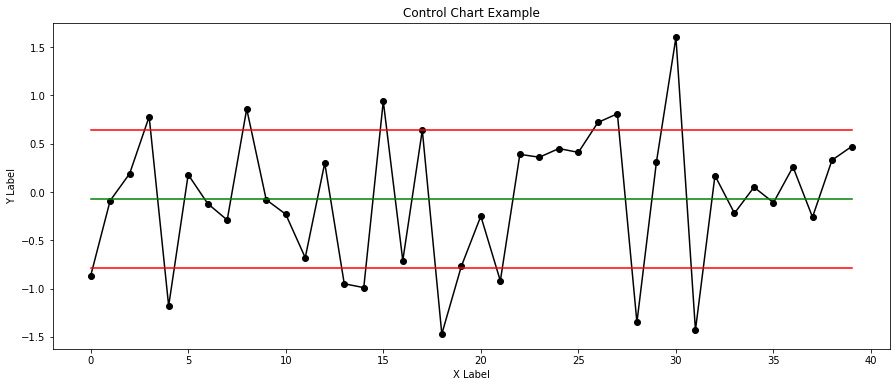

In [8]:
chart_ejemplo.plot(title='Control Chart Example',
                  xlabel = 'X Label',
                  ylabel = 'Y Label',)

In [9]:
deviations = chart_ejemplo.deviations()
deviations

,index,value,sign,size
0,2014-01-02,-0.870003,defect,0.088076
1,2014-01-07,0.779999,excess,0.135572
2,2014-01-08,-1.180000,defect,0.398073
3,2014-01-14,0.860001,excess,0.215574
4,2014-01-22,-0.949997,defect,0.168070
5,2014-01-23,-0.990005,defect,0.208078
6,2014-01-24,0.940002,excess,0.295575
7,2014-01-29,-1.470001,defect,0.688074
8,2014-02-03,-0.920006,defect,0.138079
9,2014-02-10,0.720001,excess,0.075574


### penal_df

In [10]:
df = pd.read_excel('../penal_df_fec.xlsx')
# transformo la columna a datetime
# columna: Fecha de registro en el juzgado
df['exp_fecreg'] = pd.to_datetime(df['exp_fecreg'])

In [11]:
# convierto 'unknown' en NaN para contabilizar
import itertools as it
for i, col in it.product(df.index,df.columns):
    if df.at[i,col] == 'unknown':
        df.at[i,col] = np.nan

In [12]:
df.iloc[0:5,[0,1,2,3,4,5,18]]

,org_idradactual,exp_cuij,org_idintpri,org_cod_pri,org_descorta_pri,org_descr_Pri,exp_fecreg
0,72,01-00042685-3,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,2016-07-26 13:45:00
1,72,01-00039012-3,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,2016-05-19 15:40:00
2,72,01-00035028-8,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,2016-03-03 09:40:00
3,72,01-00036824-1,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,2016-08-04 12:20:00
4,72,01-00034124-6,72,JUZP01,JUZGADO N°1,JUZGADO DE 1RA INSTANCIA EN LO PENAL CONTRAVEN...,2016-02-15 10:25:00


In [13]:
print('Total causas: {}'.format(df.shape[0]))

Total causas: 37136


### Groupby fecha

AXEL: Acá paso a pandas el laburo de agrupación / pivot que hiciste en Excel. Lo hago en tres pasos:
(1) Agrupo la cantidad de causas por Juzgado y por período de tiempo (que puede ser mensual, quincenal, semanal, etc). En pandas lo hacemos con .groupby para los Juzgados y por .resample para el período de tiempo. Chequeo.

(2) Lo llevo a porcentajes, para sumo el total de causas en un período y divido cada juzgado por el total. Chequeo.

(3) Una vez que tenemos los datos agrupados, podemos usar nuestra class ControlChart para plotear / estudiar las desviaciones. Esto debería ser igual a tus charts, HAY QUE CHEQUEAR EL CALCULO DE LOWER Y UPPER BOUNDS.


LUCAS: 

(1) y (2): excelente, estoy haciendo un chequeo de tu info versus la mia para algun rango de tiempo, pero metodologicamente y viendo los detalles, esta bien sin duda

(3): esta bien lo que decis, la diferencia del multiplicador entre el intervalo de confianza tipico y la constante usada aca (2,66) es porque basicamente use una variacion de los mismos estudiada por Walter Shewhart y en la que basicamente apunta a usar el grafico de control para llevar los procesos a un nivel de sigma de 6, lo cual implicaria en el caso de un proceso que ya esta optimizado segun los parametros en los que tiene que actuar, que en los proximos 99,99% de los casos el resultado va a estar dentro del rango esperado... igual te digo que me mandaste a leer un poco xq hacia muchos años los usaba asi y ya no recordaba la razon, asi que me vino bien...

https://en.wikipedia.org/wiki/Shewhart_individuals_control_chart

In [14]:
# agrupo por Juzgado
df_month = df.groupby('org_cod_pri')
# agrupo por Mes
df_month = df_month.resample('w-FRI',on='exp_fecreg').count()['exp_cuij']
# lo llevo a dataframe
df_month = df_month.to_frame()
df_month = df_month.reset_index(drop=False)
# rename
df_month = df_month.rename({'org_cod_pri':'juzgado',
                            'exp_fecreg':'periodo',
                            'exp_cuij':'causas'},axis=1,)
df_month.head()

,juzgado,periodo,causas
0,JUZP01,2016-01-08,3
1,JUZP01,2016-01-15,2
2,JUZP01,2016-01-22,1
3,JUZP01,2016-01-29,3
4,JUZP01,2016-02-05,2


In [15]:
# Check
np.sum(df_month['causas'])

37136

In [16]:
# Totales por mes
df_month_totales = df_month.groupby('periodo').sum()
df_month_totales.head()

,causas
periodo,
2016-01-08,170
2016-01-15,131
2016-01-22,122
2016-01-29,79
2016-02-05,118


In [17]:
# Porcentajes
for i in df_month.index:
    periodo = df_month.at[i,'periodo']
    causas_totales = df_month_totales.loc[periodo]['causas']
    df_month.at[i,'porcentaje'] = df_month.at[i,'causas'] / causas_totales
    df_month.at[i,'porcentaje'] = df_month.at[i,'porcentaje'] * 100

df_month.head()

,juzgado,periodo,causas,porcentaje
0,JUZP01,2016-01-08,3,1.764706
1,JUZP01,2016-01-15,2,1.526718
2,JUZP01,2016-01-22,1,0.819672
3,JUZP01,2016-01-29,3,3.797468
4,JUZP01,2016-02-05,2,1.694915


In [18]:
# Check
# Totales por mes
df_month_check = df_month.groupby('periodo').sum()
df_month_check.head()

,causas,porcentaje
periodo,,
2016-01-08,170,100.0
2016-01-15,131,100.0
2016-01-22,122,100.0
2016-01-29,79,100.0
2016-02-05,118,100.0


In [19]:
for i in df_month_check.index:
    diff = abs(df_month_check.at[i,'porcentaje'] - 100)
    if diff > 0.000000001:
        print('Check row {}'.format(i))
else:
    print('Check OK!')

Check OK!


Ahora sí, tengo los porcentajes agrupados por período y por juzgado, puedo construir la series para pasarle al ControlChart. 

In [20]:
# Ejemplo
juz1_2019 = df_month[(df_month['periodo'].dt.year == 2019) & (df_month['juzgado'] == 'JUZP01')]
juz1_2019.head()

,juzgado,periodo,causas,porcentaje
156,JUZP01,2019-01-04,2,0.833333
157,JUZP01,2019-01-11,2,0.851064
158,JUZP01,2019-01-18,2,1.398601
159,JUZP01,2019-01-25,1,0.480769
160,JUZP01,2019-02-01,5,3.086420


In [21]:
series_juz1_2019 = pd.Series(data = juz1_2019['porcentaje'].values,
                            index = juz1_2019['periodo'].values)

In [22]:
series_juz1_2019.head()

2019-01-04    0.833333
2019-01-11    0.851064
2019-01-18    1.398601
2019-01-25    0.480769
2019-02-01    3.086420
dtype: float64

In [23]:
# AXEL: estas cuentas hay que chequear, no estoy seguro las fórmulas
# Yo usé el formato típico de intervalo de confianza

# LUCAS: modifico los multiplicadores de 1.96 a 2.66 a fin de seguir el mismo tipo de estudio que venia siguiendo 

# lo que habria que modificar seria la serie de datos usados para calcular el mean
# ya que no queremos realmente usar toda la data sino una serie de "buenos datos"
# a fin de poder setear limites que sean estadisticamente validos y calculados con ejemplos proceduralmente deseables

# se me ocurre que podriamos pasarle a np.mean una serie de 8-10 indices de los valores que queremos 
# usar para el calculo del valor de center, por ejemplo en el grafico de abajo no usaria al punto 4 ya que estaria
# tomando como normal y desable un valor que dista en mas del 300% de su predecesor, el grafico del MR un poco ayuda
# a identificar eso tmb, pero para la correcta implementacion de un grafico que a futuro sea capaz de identificar
# cambios en el proceso subyacente, es necesario fijar los limites, y hacerlo con muestras de periodos en los que 
# el mismo estuvo dentro de lo deseable.
# Aca implemento esa limitacion al baseline e introduzco el moving range para reemplazar el standard deviation

baseline=[]
baseline.extend(series_juz1_2019[0:10])
#baseline.extend(series_juz1_2016[5:11])

mR=[]
counter =0

for i in baseline:
    if counter==0: 
        pass
    else:
        a=baseline[counter]-baseline[counter-1]
        mR.append(abs(a))
    counter=counter +1

mR_mean=np.mean(mR)

In [24]:
#center = np.mean(series_juz1_2016.values)
center=np.mean(baseline)
#series_std = np.std(series_juz1_2016.values)
upper_bound = center + 2.66 * mR_mean
lower_bound = max(center - 2.66 * mR_mean,0) # pequeña adaptacion para que el limite inferior no sea negativo
control_juz1_2019 = ControlChart(series_juz1_2019, center, 
                                 lower_bound, upper_bound)

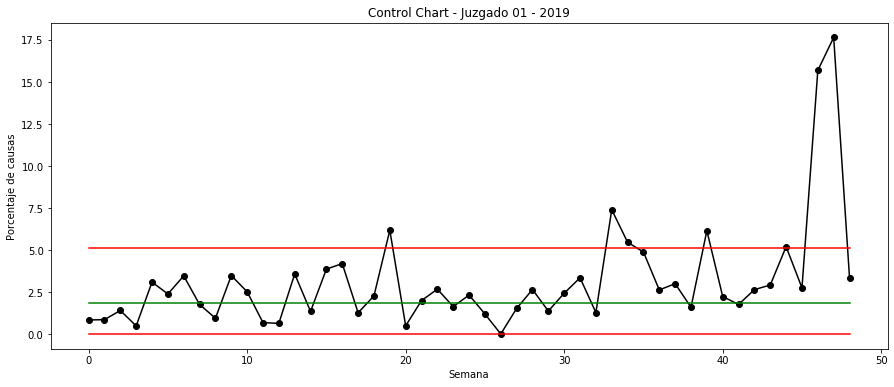

In [25]:
control_juz1_2019.plot(title='Control Chart - Juzgado 01 - 2019',
                       xlabel = 'Semana',
                       ylabel = 'Porcentaje de causas')

es exactamente igual al grafico del Excel:

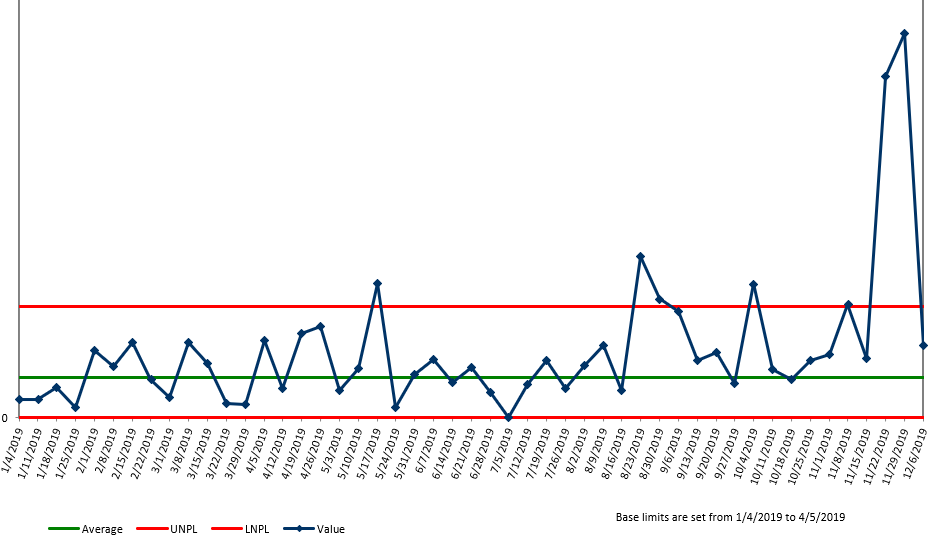

In [26]:
print ("UNPL: ", upper_bound)
print ("LNPL: ", lower_bound)
print ("Mean: ", center)
print ("mR_mean: ", mR_mean)


UNPL:  5.095795654221101
LNPL:  0
Mean:  1.8656408528829922
mR_mean:  1.2143439102774847


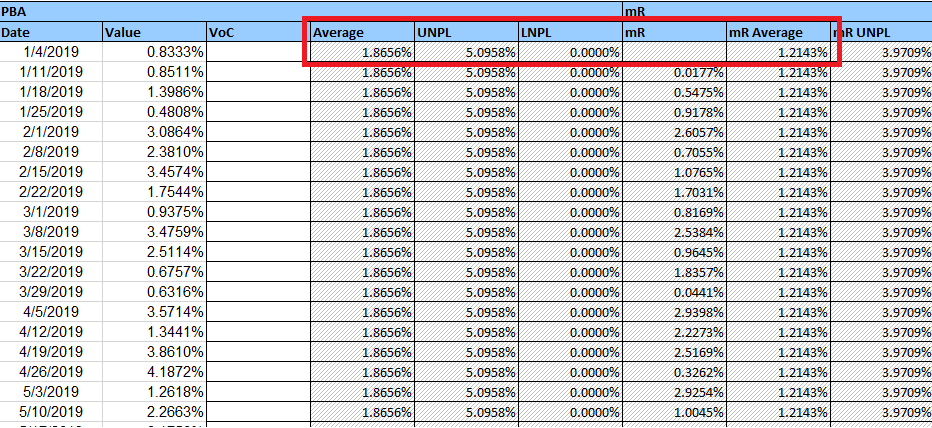


In [27]:
control_juz1_2019.deviations()

,index,value,sign,size
0,2019-05-17,6.174957,excess,1.079161
1,2019-08-23,7.394366,excess,2.298571
2,2019-08-30,5.459057,excess,0.363261
3,2019-10-04,6.147541,excess,1.051745
4,2019-11-08,5.194805,excess,0.099010
5,2019-11-22,15.686275,excess,10.590479
6,2019-11-29,17.647059,excess,12.551263


### Charts por Juzgado

Para exportar los charts por juzgado, agrupamos todos los pasos del ejemplo desarrollado y loopeamos sobre el conjunto de juzgados existente.

In [28]:
juzgados = df_month['juzgado'].unique()
juzgados

array(['JUZP01', 'JUZP02', 'JUZP03', 'JUZP04', 'JUZP05', 'JUZP06',
       'JUZP07', 'JUZP08', 'JUZP09', 'JUZP10', 'JUZP11', 'JUZP12',
       'JUZP13', 'JUZP14', 'JUZP15', 'JUZP16', 'JUZP17', 'JUZP18',
       'JUZP19', 'JUZP20', 'JUZP21', 'JUZP22', 'JUZP23', 'JUZP24',
       'JUZP25', 'JUZP26', 'JUZP27', 'JUZP28', 'JUZP29', 'JUZP30',
       'JUZP31', 'SDPCYF'], dtype=object)

In [29]:
for juzgado in juzgados:
    # Construcción de la serie de cada juzgado
    filtro_juzgado = df_month[(df_month['periodo'].dt.year == 2019) & (df_month['juzgado'] == juzgado)]
    serie_juzgado = pd.Series(data = filtro_juzgado['porcentaje'].values,
                                index = filtro_juzgado['periodo'].values)

    # Cálculo de moving Range para Chart
    baseline=[]
    baseline.extend(serie_juzgado[0:10])
    mR = []
    counter = 0
    for i in baseline:
        if counter == 0: 
            pass
        else:
            a = baseline[counter] - baseline[counter-1]
            mR.append(abs(a))
        counter = counter + 1

    mR_mean=np.mean(mR)

    # instanciamos Control Chart
    center = np.mean(baseline)
    upper_bound = center + 2.66 * mR_mean
    lower_bound = max(center - 2.66 * mR_mean,0) # pequeña adaptacion para que el limite inferior no sea negativo
    control_juzgado = ControlChart(serie_juzgado, center, 
                                     lower_bound, upper_bound)

    # Ploteamos
    control_juzgado.plot(title = 'Control Chart - Juzgado ' + juzgado[4:6] + ' - 2019',
                         xlabel = 'Semana',
                         ylabel = 'Porcentaje de causas',
                         show = False, export_file = True,
                         filename = 'Charts/Control Chart - Juzgado ' + juzgado[4:6] + ' - 2019')

### Pendientes

Este mismo procedimiento hacerlo para "quincenas mensuales" (como los turnos) y para semanas (como está en tu Excel, Axel). Lo otro que habría que chequear son los cálculos de center, lower bound, upper bound.
También se pueden customizar los charts con más amor.

<b>Done!</b>

Update: bueno, aparte de unos pequeños cambios esteticos, cambie el agrupamiento a semanal y sobre el 2019, que es lo que ya tenia, a fin de poder comparar resultados, y con weekending day los viernes ya que es asi como lo vengo usando... igualmente eso es totalmente cambiable ya que es solo la forma en que estoy acostumbrado a hacerlo nada mas... por otro lado agregue el moving range y dsp de una prueba los graficos son equivalentes... lo que tendriamos que ver es como iterar sobre los distintos juzgados y sacar los distintos charts de una para poder analizarlos... 

<b>Done!</b>

Otra cosa q queda pendiente, pero ya seria un mas complicado seria poder hacer cambios de baseline sobre la marcha, es decir por ejemplo se inciia una metrica y luego de mejoras en el proceso se logra que el mismo tenga un average mas alto o mas bajo, y se decide regraficar los limites en base al nuevo mea... igual es algo que no seria 100% necesario para el estudio que estamos haciendo...

<b>Pendiente</b>

Bueno, creo que el grafico estaria listo, lo que tenemos pendiente entonces es el agrupamielento en quincenas o el tema de las guardias que es un poco mas complejo... eso lo puedo ver yo... lo que te pediria es ver como se te ocurre que podemos iterar y generar los 31 graficos de una sola vez... seguro lo sacas al toque asi que eso lo dejo a ver que se te ocurre...

<b>Done el loop!</b>